In [32]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

In [33]:
t = None
def strptime(x):
    try:
        t = datetime.strptime(x, "%H:%M:%S")
    except ValueError:
        t = datetime.strptime(x, "%H:%M:%S.%f")
    return timedelta(seconds=t.second, milliseconds=t.microsecond/1000).total_seconds()

df = pd.read_csv('data.csv', delimiter='|')
df.time = df.time.map(strptime)
df

,permutation,time
0,"(0, 1, 2, 3, 4)",13.826996
1,"(0, 1, 2, 3, 4)",14.719000
2,"(0, 1, 2, 3, 4)",15.049000
3,"(0, 1, 2, 3, 4)",15.058002
4,"(0, 1, 2, 3, 4)",15.136001
...,...,...
2395,"(4, 3, 2, 1, 0)",22.977000
2396,"(4, 3, 2, 1, 0)",22.993001
2397,"(4, 3, 2, 1, 0)",22.964003
2398,"(4, 3, 2, 1, 0)",23.052001


<Axes: >

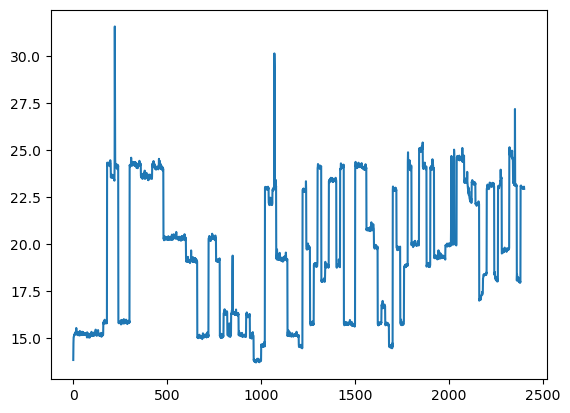

In [34]:
df.time.plot()

          permutation       time
0     (0, 1, 2, 3, 4)  13.826996
1     (0, 1, 2, 3, 4)  14.719000
2     (0, 1, 2, 3, 4)  15.049000
3     (0, 1, 2, 3, 4)  15.058002
4     (0, 1, 2, 3, 4)  15.136001
...               ...        ...
2380  (4, 3, 2, 1, 0)  23.093000
2381  (4, 3, 2, 1, 0)  23.070251
2382  (4, 3, 2, 1, 0)  23.113009
2383  (4, 3, 2, 1, 0)  23.108000
2384  (4, 3, 2, 1, 0)  23.020028

[600 rows x 2 columns]


In [49]:
df_grouped_perm = df.groupby('permutation').mean().sort_values(by='time')
display(df_grouped_perm)

fastest_10_permutations = df_grouped_perm.head(10)
display(fastest_10_permutations)

slowest_10_permutations = df_grouped_perm.tail(10)
display(slowest_10_permutations)

fastest_30_permutations = df_grouped_perm.head(30)
slowest_30_permutations = df_grouped_perm.tail(30)

,time
permutation,
"(2, 0, 1, 3, 4)",13.789752
"(2, 0, 1, 4, 3)",13.796209
"(3, 2, 0, 1, 4)",14.551613
"(2, 3, 0, 1, 4)",14.555042
"(2, 0, 3, 1, 4)",14.597333
...,...
"(4, 1, 0, 3, 2)",24.527808
"(4, 1, 0, 2, 3)",24.564977
"(0, 2, 4, 3, 1)",24.676228


,time
permutation,
"(2, 0, 1, 3, 4)",13.789752
"(2, 0, 1, 4, 3)",13.796209
"(3, 2, 0, 1, 4)",14.551613
"(2, 3, 0, 1, 4)",14.555042
"(2, 0, 3, 1, 4)",14.597333
"(1, 2, 3, 4, 0)",15.057650
"(1, 2, 4, 0, 3)",15.079992
"(1, 4, 3, 2, 0)",15.099834
"(1, 3, 2, 4, 0)",15.100835


,time
permutation,
"(3, 2, 4, 1, 0)",24.188350
"(0, 3, 4, 2, 1)",24.208164
"(0, 3, 4, 1, 2)",24.237657
"(0, 3, 2, 4, 1)",24.253912
"(0, 2, 3, 4, 1)",24.266008
"(4, 1, 0, 3, 2)",24.527808
"(4, 1, 0, 2, 3)",24.564977
"(0, 2, 4, 3, 1)",24.676228
"(4, 3, 1, 0, 2)",24.756552


In [61]:
# Group the fastest four permutations to prepare scores for ANOVA
top4 = df_grouped_perm.head(4)
top_12 = top4.head(2)
top_34= top4.tail(2)

# Single out fastest and second fastest permutation
single_top1 = df_grouped_perm.head(1)
single_top2 = top_12.tail(1)

# Group the slowest four permutations to prepare scores for ANOVA
bottom4 = df_grouped_perm.tail(4)
bottom_12 = bottom4.tail(2)
bottom_34 = bottom4.head(2)

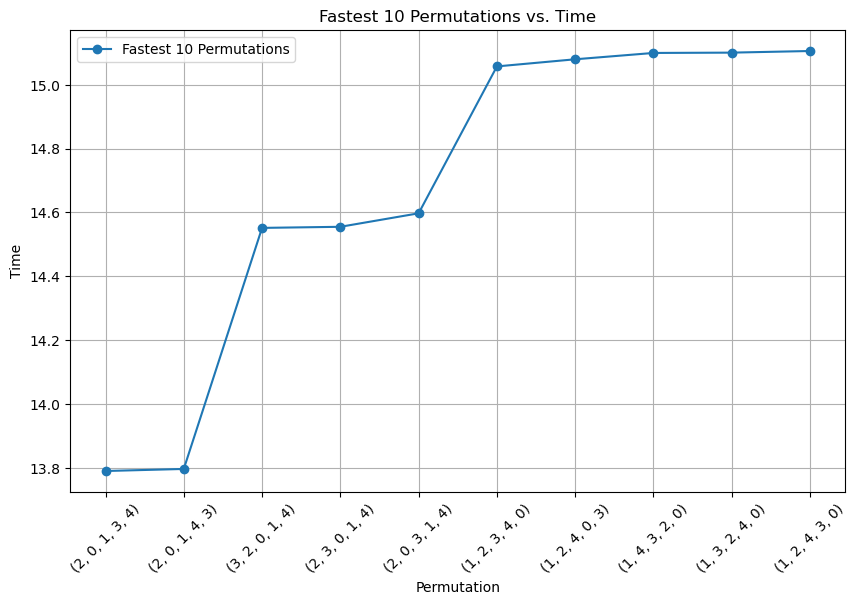

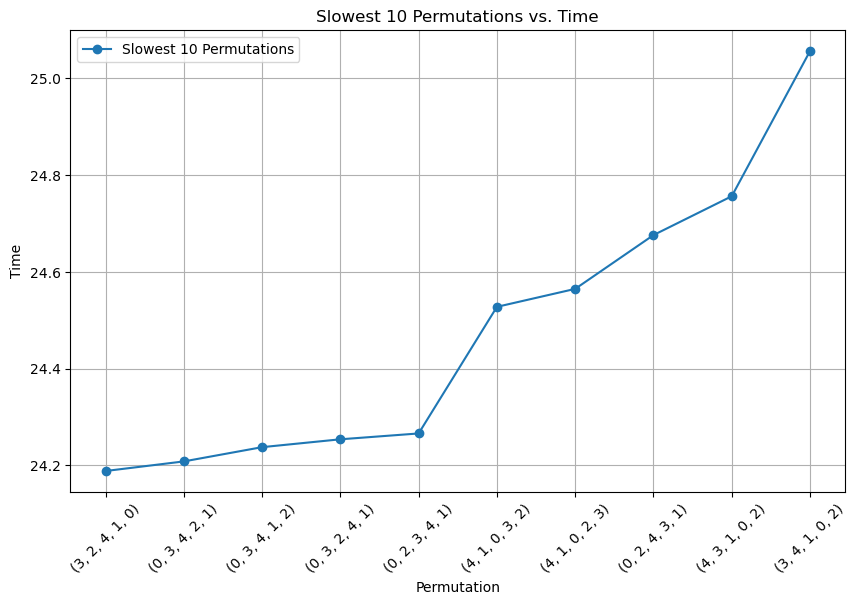

In [36]:
plt.figure(figsize=(10, 6))  # Adjust figsize as needed
plt.plot(fastest_10_permutations.index, fastest_10_permutations['time'], marker='o', label='Fastest 10 Permutations')
plt.xlabel('Permutation')
plt.ylabel('Time')
plt.title('Fastest 10 Permutations vs. Time')
plt.legend()
plt.xticks(rotation=45)  # Rotate x-axis labels if needed
plt.grid(True)
plt.show()

# Plotting the slowest 10 permutations as a line plot
plt.figure(figsize=(10, 6))  # Adjust figsize as needed
plt.plot(slowest_10_permutations.index, slowest_10_permutations['time'], marker='o', label='Slowest 10 Permutations')
plt.xlabel('Permutation')
plt.ylabel('Time')
plt.title('Slowest 10 Permutations vs. Time')
plt.legend()
plt.xticks(rotation=45)  # Rotate x-axis labels if needed
plt.grid(True)
plt.show()

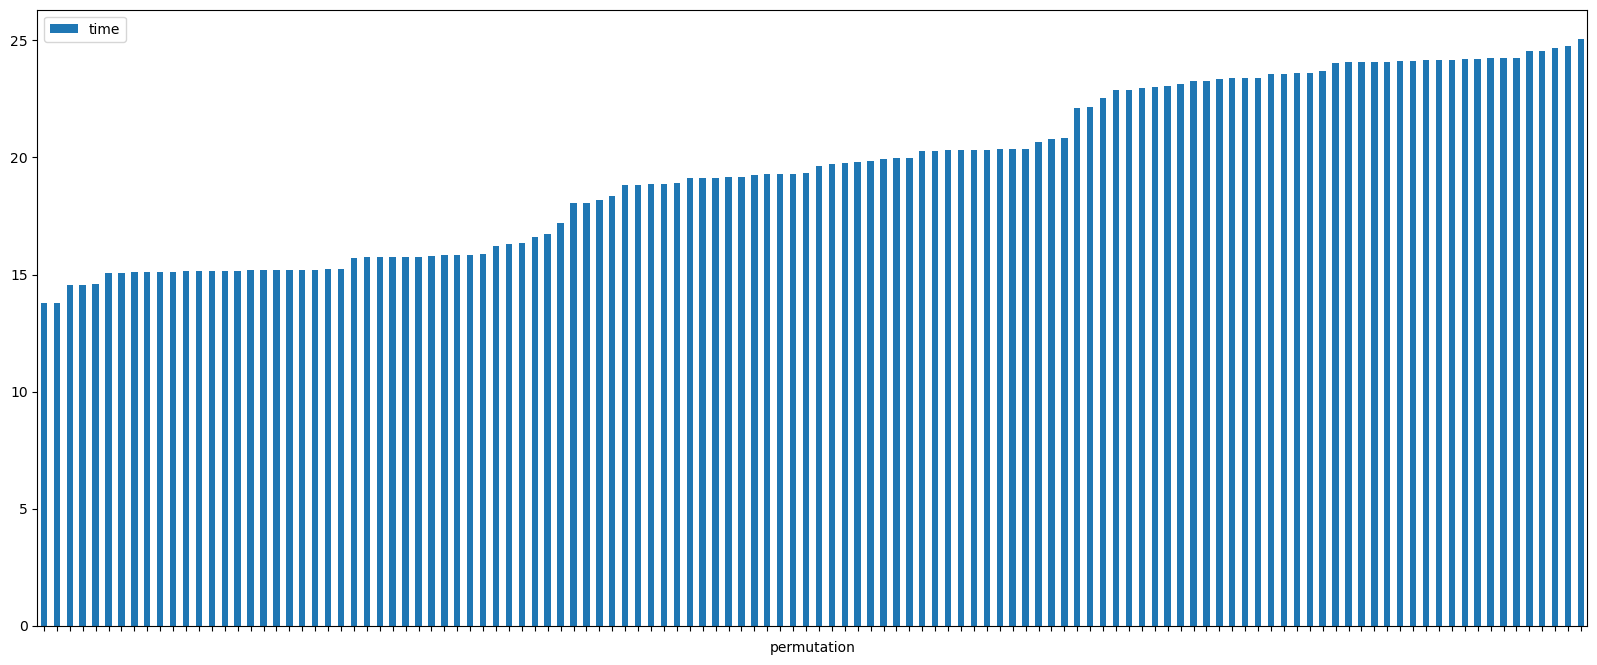

In [77]:
plotted = df_grouped_perm.plot(kind='bar', figsize=(20, 8)) 

# Rotate the x-axis labels 
plotted.set_xticklabels([])
plt.show()

In [ ]:
t = None
def strptime(x):
    try:
        t = datetime.strptime(x, "%H:%M:%S")
    except ValueError:
        t = datetime.strptime(x, "%H:%M:%S.%f")
    return timedelta(seconds=t.second, milliseconds=t.microsecond/1000).total_seconds()

df = pd.read_csv('data.csv', delimiter='|')
df.time = df.time.map(strptime)
df

,permutation,time
0,"(0, 1, 2, 3, 4)",13.826996
1,"(0, 1, 2, 3, 4)",14.719000
2,"(0, 1, 2, 3, 4)",15.049000
3,"(0, 1, 2, 3, 4)",15.058002
4,"(0, 1, 2, 3, 4)",15.136001
...,...,...
2395,"(4, 3, 2, 1, 0)",22.977000
2396,"(4, 3, 2, 1, 0)",22.993001
2397,"(4, 3, 2, 1, 0)",22.964003
2398,"(4, 3, 2, 1, 0)",23.052001


<Axes: >

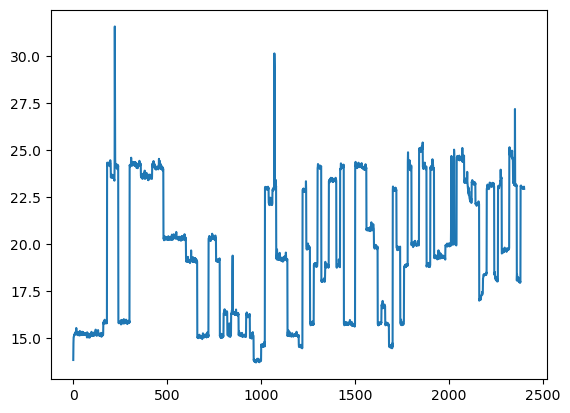

In [ ]:
df.time.plot()

### Is it useful to compare the 30 slowest and fastest in an ANOVA? 

In [56]:
from scipy.stats import f_oneway


# Create lists of times 
fastest_times_values = fastest_30_permutations['time'].values.tolist()
slowest_times_values = slowest_30_permutations['time'].values.tolist()

# Perform ANOVA test
f_statistic, p_value = f_oneway(fastest_times_values, slowest_times_values)

# Print ANOVA test results
print("ANOVA F-Statistic:", f_statistic)
print("ANOVA p-value:", p_value)

# Interpret the results
alpha = 0.05  # Set the significance level
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference between means of the fastest 30 permutations and the slowest 30 permutations.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference between means of the fastest 30 permutations and the slowest 30 permutations.")
print('')
print('')

# Performa ANOVA with top (1, 2) and top (3, 4)
# Create lists of times 
top_12_values = top_12['time'].values.tolist()
top_23_values = top_34['time'].values.tolist()

f_statistic, p_value = f_oneway(top_12_values, top_23_values)

# Print ANOVA test results
print("ANOVA F-Statistic:", f_statistic)
print("ANOVA p-value:", p_value)

# Interpret the results
alpha = 0.05  # Set the significance level
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference between means of the two fastest permutations and the 3rd and 4th fastest permutations.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference between means of the two fastest permutations and the 3rd and 4th fastest permutations.")
print('')
print('')

# Performa ANOVA with bpttom (1, 2) and bottom (3, 4)
# Create lists of times 
bottom_12_values = bottom_12['time'].values.tolist()
bottom_23_values = bottom_34['time'].values.tolist()

f_statistic, p_value = f_oneway(bottom_12, bottom_34)

# Print ANOVA test results
print("ANOVA F-Statistic:", f_statistic)
print("ANOVA p-value:", p_value)

# Interpret the results
alpha = 0.05  # Set the significance level
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference between means of the two slowest permutations and the 3rd and 4th slowest permutations.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference between means of the two slowest permutations and the 3rd and 4th slowest permutations.")


ANOVA F-Statistic: 5361.002986128065
ANOVA p-value: 7.522498106944917e-59
Reject the null hypothesis: There is a significant difference between means of the fastest 30 permutations and the slowest 30 permutations.


ANOVA F-Statistic: 43266.95976484648
ANOVA p-value: 2.311152293306241e-05
Reject the null hypothesis: There is a significant difference between means of the two fastest permutations and the 3rd and 4th fastest permutations.


ANOVA F-Statistic: [3.19254502]
ANOVA p-value: [0.2158875]
Fail to reject the null hypothesis: There is no significant difference between means of the two slowest permutations and the 3rd and 4th slowest permutations.


In [74]:
df_grouped_for_ttest = df.groupby('permutation').head(5)

print(df.groupby('permutation'))
print(df_grouped_for_ttest)


# Filter the DataFrame for a specific permutation
best_permutation = '(2, 0, 1, 3, 4)'
secondbest_permutation = '(2, 0, 1, 4, 3)'

best_permutation_values = df_grouped_for_ttest[df_grouped_for_ttest['permutation'] == best_permutation]['time'].tolist()
secondbest_permutation_values = df_grouped_for_ttest[df_grouped_for_ttest['permutation'] == secondbest_permutation]['time'].tolist()


# Print the list of time values for the specific permutation
print(best_permutation_values)
print(secondbest_permutation_values)

          permutation       time
0     (0, 1, 2, 3, 4)  13.826996
1     (0, 1, 2, 3, 4)  14.719000
2     (0, 1, 2, 3, 4)  15.049000
3     (0, 1, 2, 3, 4)  15.058002
4     (0, 1, 2, 3, 4)  15.136001
...               ...        ...
2380  (4, 3, 2, 1, 0)  23.093000
2381  (4, 3, 2, 1, 0)  23.070251
2382  (4, 3, 2, 1, 0)  23.113009
2383  (4, 3, 2, 1, 0)  23.108000
2384  (4, 3, 2, 1, 0)  23.020028

[600 rows x 2 columns]
[13.807001, 13.858001, 13.848001, 13.776001, 13.736001]
[13.760027, 13.806027, 13.771, 13.895001, 13.814014]


In [75]:
from scipy.stats import ttest_ind

# Perform a t-test with slowest permutation against 2nd slowest
t_statistic, p_value_t = ttest_ind(best_permutation_values, secondbest_permutation_values)
print("Two samples t-statistic:", t_statistic)
print("Two samples t-test p-value:", p_value_t)

alpha = 0.05  # Set the significance level
if p_value_t < alpha:
    print("Reject the null hypothesis: There is a significant difference between means.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference between the fastest and second fastest permutation")


Two samples t-statistic: -0.12838093203910683
Two samples t-test p-value: 0.9010162345343989
Fail to reject the null hypothesis: There is no significant difference between the fastest and second fastest permutation
